<a href="https://colab.research.google.com/github/GrainSack/GrainSack/blob/main/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import display, Image
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
macbook = pd.read_csv('/content/drive/MyDrive/AIFFEL/mac/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


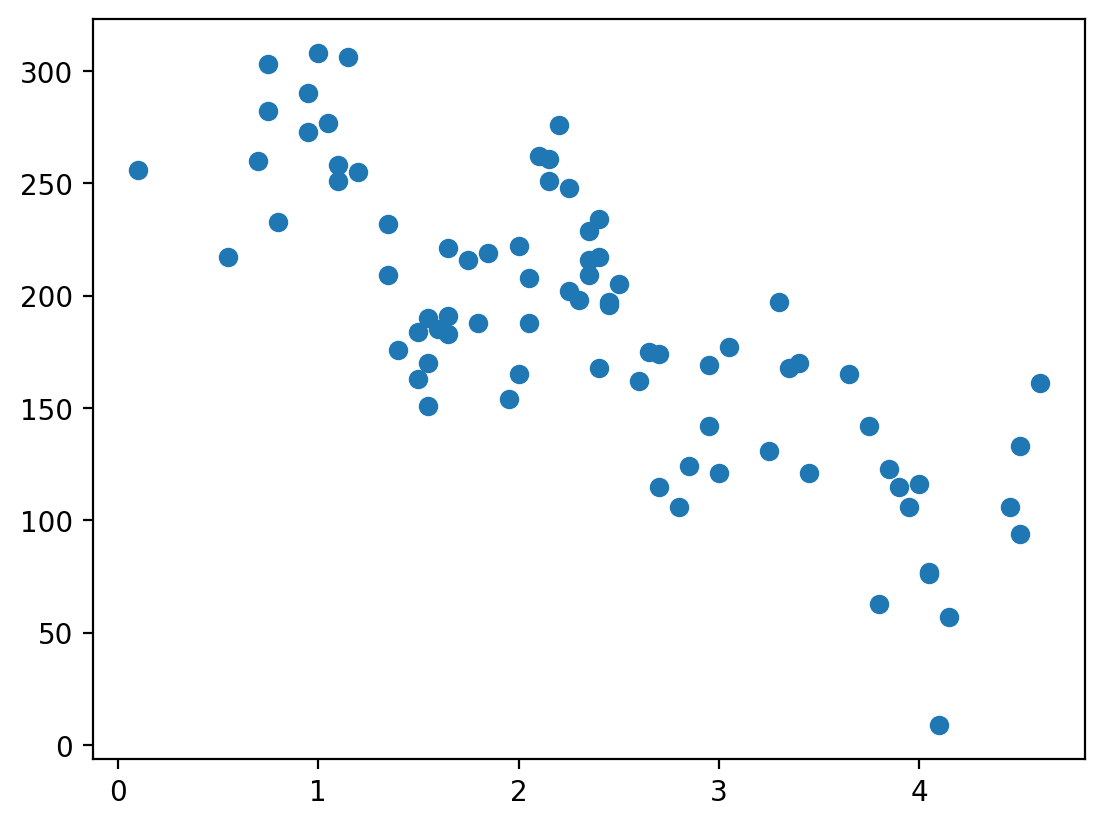

In [6]:
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### Correlation
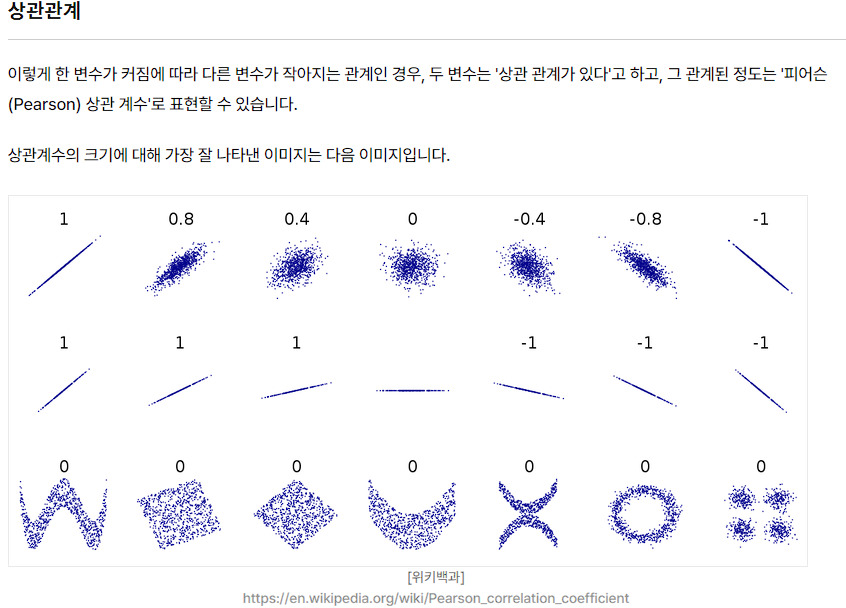

상관관계 and 인과관계 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%EC%99%80_%EC%9D%B8%EA%B3%BC%EA%B4%80%EA%B3%84

In [7]:
#correlation coefficient
import numpy as np

# np.corrcoef(x, y)를 사용합니다.
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

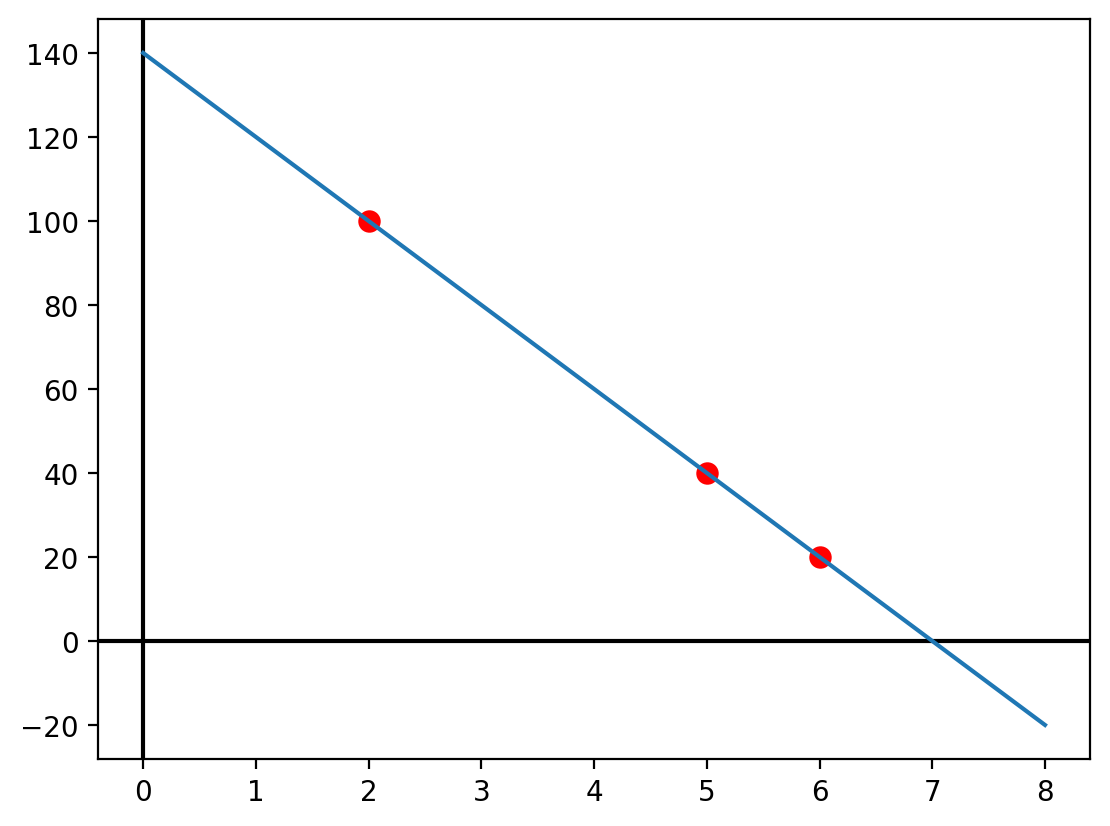

In [10]:
x = macbook["used_years"].values
y = macbook["price"].values

def model(x, w, b):
    y = w * x + b
    return y
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y = wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w=-20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6]
y_data = [100, 40, 20]
plt.scatter(x_data, y_data, c='r', s=50)

plt.show()

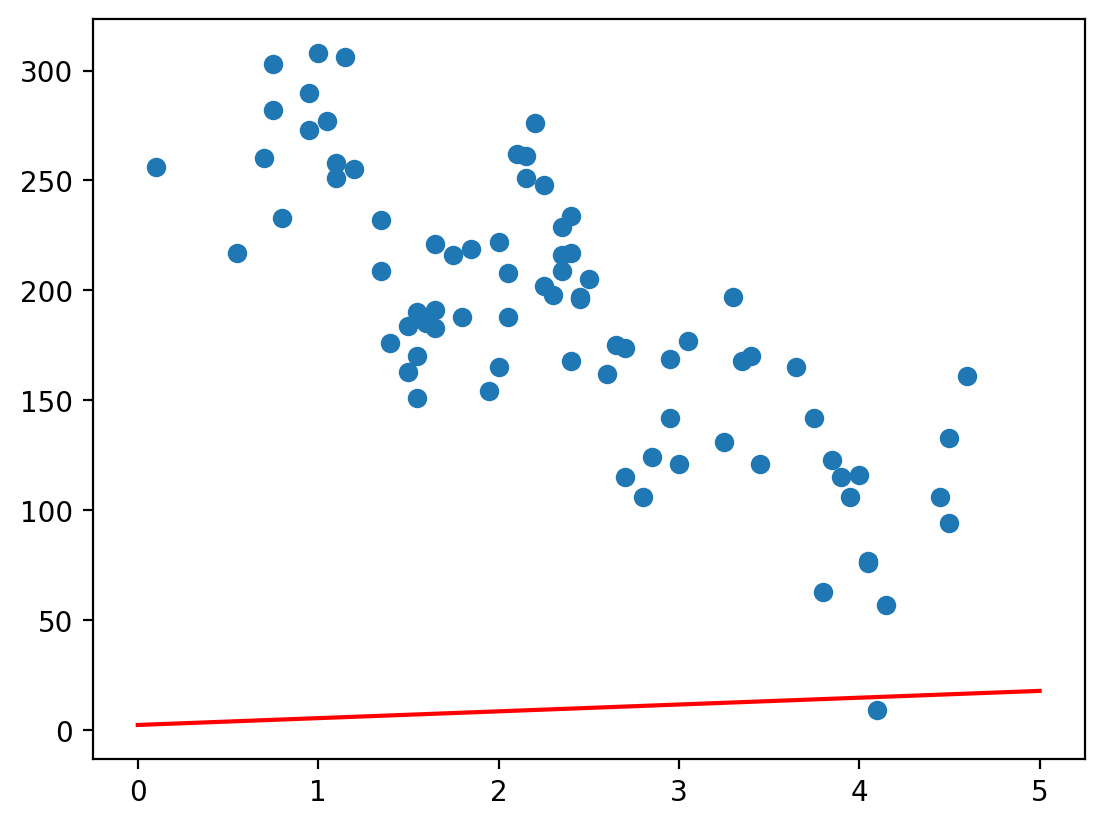

In [12]:
#Not learning
w = 3.1
b = 2.3
x = np.linspace(0, 5, 6)
y = model(x, w, b) # y = 3.1x + 2.3
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [14]:
x = macbook["used_years"].values
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
macbook['prediction'] = prediction
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


### Regression Evaluation metric
- MAE (Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

- MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

- RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

- R-squared (Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is

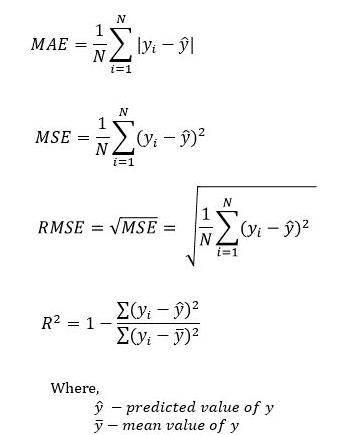

In [15]:
#RMSE
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [16]:
rmse = RMSE(predictions, y)
rmse

188.81322969819274

In [17]:
#Cost funtion
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
#Gradient
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db

In [18]:
LEARNING_RATE = 1
x = macbook["used_years"].values
y = macbook["price"].values
losses = []
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw         # 5번: w = w - η * dw 로 업데이트
    b -= LEARNING_RATE * db         # 5번: b = b - η * db 로 업데이트 
    L = loss(x, w, b, y)            # 현재의 loss 값 계산
    losses.append(L)                # loss 값 기록
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 108.0080
Iteration 200 : Loss 94.5709
Iteration 300 : Loss 81.8560
Iteration 400 : Loss 70.1799
Iteration 500 : Loss 59.9778
Iteration 600 : Loss 51.7475
Iteration 700 : Loss 45.8356
Iteration 800 : Loss 42.1474
Iteration 900 : Loss 40.1357
Iteration 1000 : Loss 39.1420
Iteration 1100 : Loss 38.6793
Iteration 1200 : Loss 38.4703
Iteration 1300 : Loss 38.3772
Iteration 1400 : Loss 38.3360
Iteration 1500 : Loss 38.3179
Iteration 1600 : Loss 38.3099
Iteration 1700 : Loss 38.3064
Iteration 1800 : Loss 38.3048
Iteration 1900 : Loss 38.3041
Iteration 2000 : Loss 38.3038


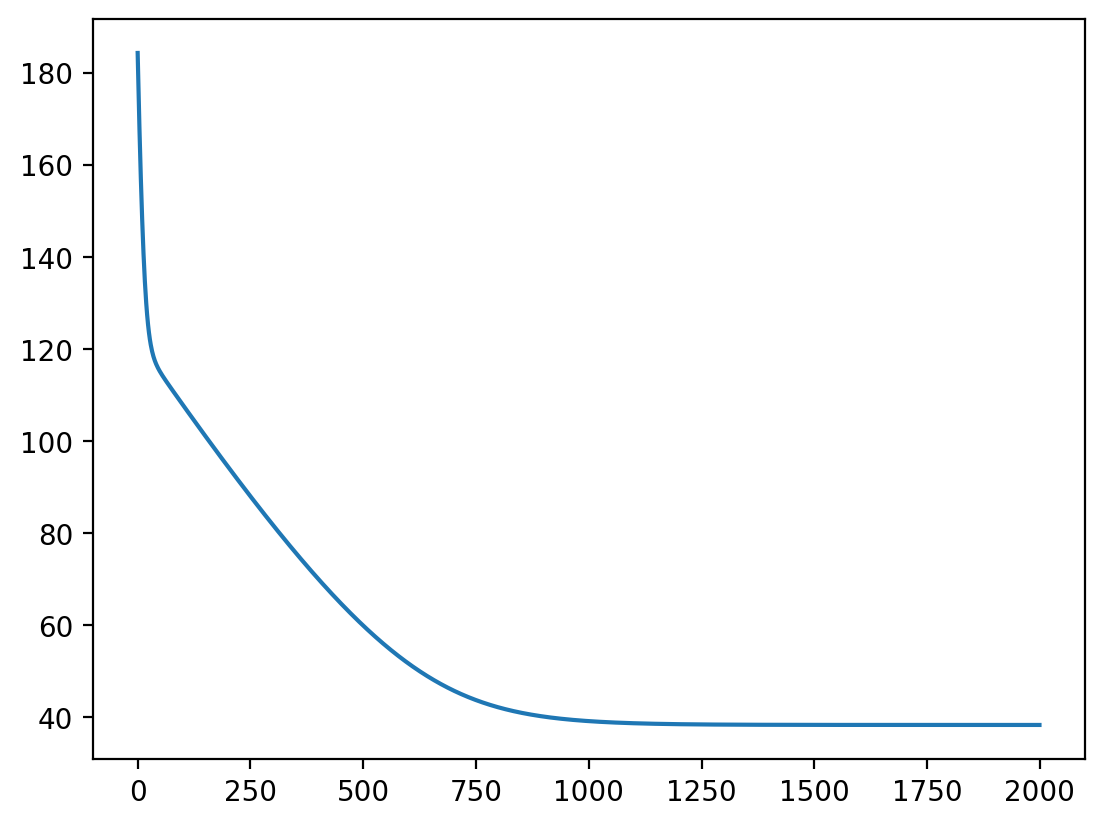

In [19]:
plt.plot(losses)
plt.show()

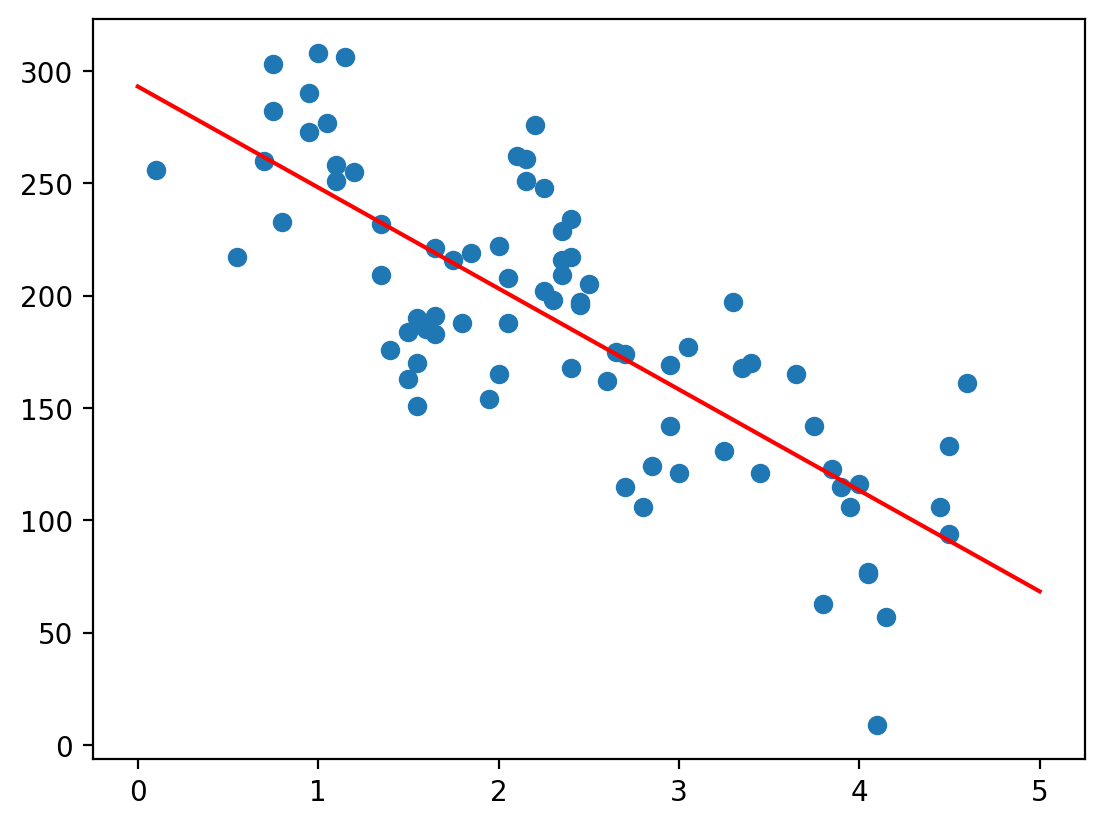

In [20]:
#After learning

# 모델에 넣을 x 값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b)

# 일차함수 y 그리기
plt.plot(y, c="r")

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [21]:
test = pd.read_csv("/content/drive/MyDrive/AIFFEL/mac/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [22]:
test_x = test['used_years'].values
test_y = test['price'].values
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.168506
1,1.85,206,209.965591
2,2.40,191,185.255432
3,2.85,164,165.038030
4,3.05,176,156.052518
5,3.35,136,142.574250
6,2.55,133,178.516298
7,2.60,181,176.269920
8,2.50,181,180.762676
9,3.10,86,153.806140


In [23]:
test['error'] = test['price'] - test['prediction']
rmse = ((test['error'] ** 2).sum() / len(test)) ** 0.5
print(test,rmse)

    used_years  price  prediction       error
0         1.20    203  239.168506  -36.168506
1         1.85    206  209.965591   -3.965591
2         2.40    191  185.255432    5.744568
3         2.85    164  165.038030   -1.038030
4         3.05    176  156.052518   19.947482
5         3.35    136  142.574250   -6.574250
6         2.55    133  178.516298  -45.516298
7         2.60    181  176.269920    4.730080
8         2.50    181  180.762676    0.237324
9         3.10     86  153.806140  -67.806140
10        2.70    171  171.777164   -0.777164
11        3.40    253  140.327872  112.672128
12        1.30    263  234.675749   28.324251
13        1.80    129  212.211969  -83.211969
14        3.10    135  153.806140  -18.806140
15        1.55    236  223.443859   12.556141
16        1.80    206  212.211969   -6.211969
17        3.55    203  133.588737   69.411263
18        3.40     96  140.327872  -44.327872
19        2.50    115  180.762676  -65.762676 45.03918284717212


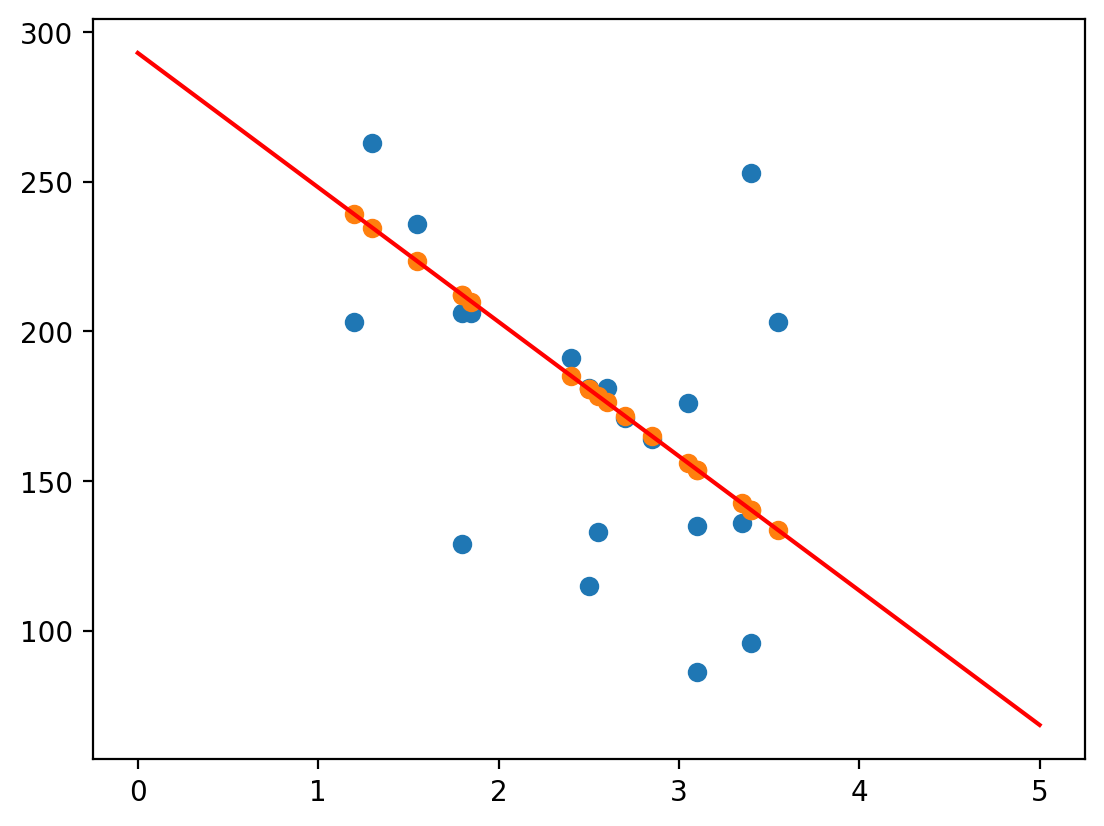

In [24]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c="r")

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

### Multi features regression

In [25]:
import seaborn as sns
sns.get_dataset_names()
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Dummy variable : https://kkokkilkon.tistory.com/37

In [26]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [27]:
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


In [28]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


In [31]:
#Initialized random variable
W = np.random.rand(12)
b = np.random.rand()
#Linear regression model
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
#Loss
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
#Gradient
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [422.60217561  51.66121542  12.06217088   6.44573566   7.60672711
  10.90117944   4.44497481   1.32517914   6.65991596   6.07783664
   4.78690823  13.72099832]
db: 18.507906543949414


In [ ]:
LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

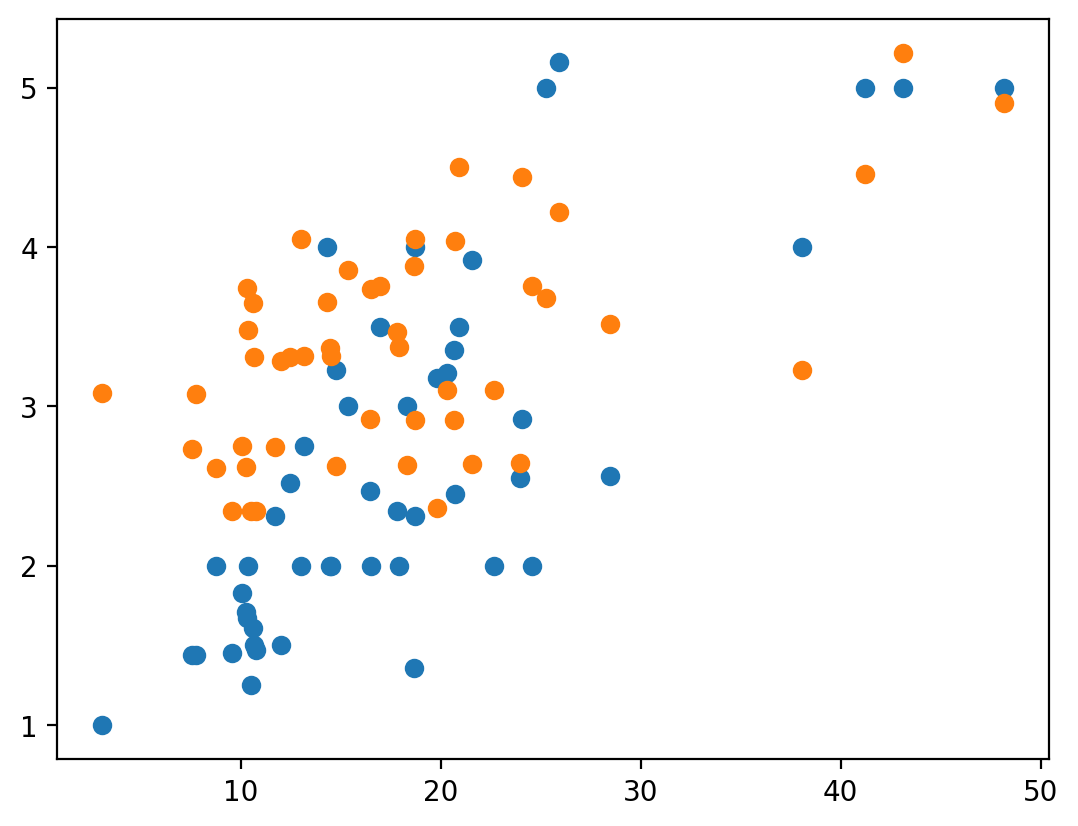

In [33]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [34]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

0.7033566017436103

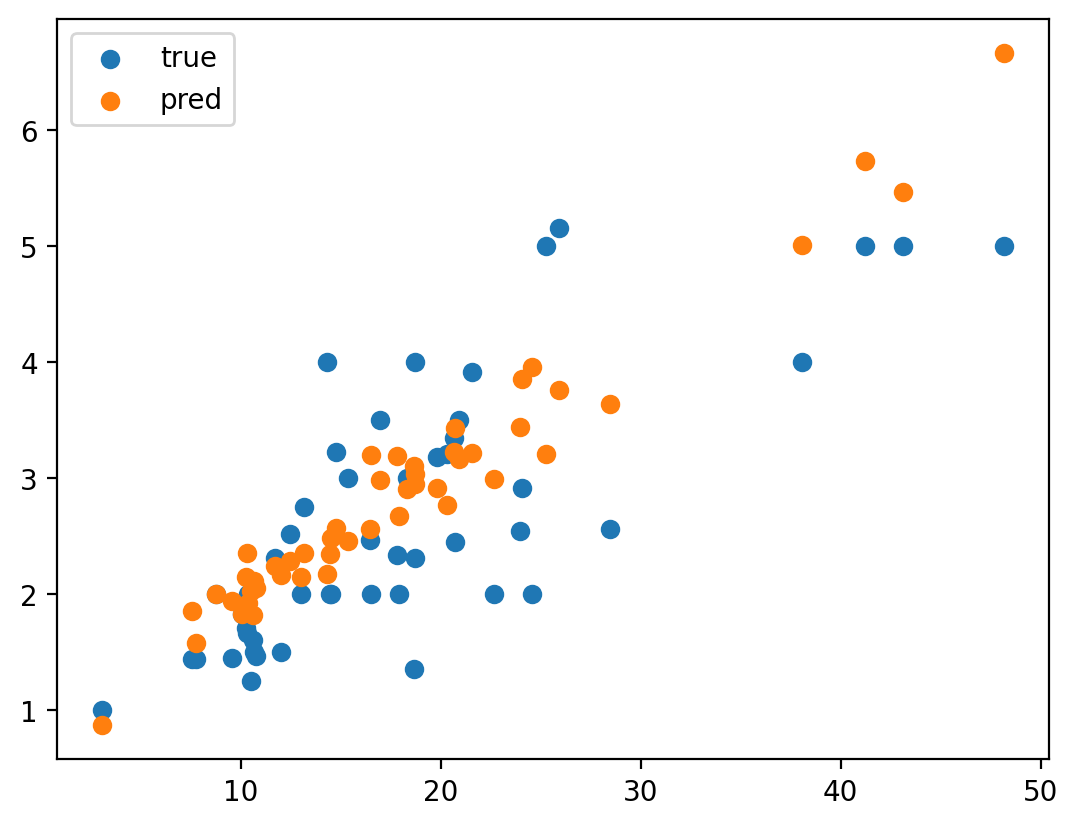

In [36]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

### Small Project

In [103]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [104]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [105]:
diabetes.target.shape

(442,)

In [106]:
df_x=np.array(diabetes.data)
df_y=np.array(diabetes.target)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [110]:
#Initialized random variable
W = np.random.rand(10)
b = np.random.rand()
#Linear regression model
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
#Loss
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
#Gradient
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

Iteration 10 : Loss 29538.3730
Iteration 20 : Loss 29444.5478
Iteration 30 : Loss 29351.0969
Iteration 40 : Loss 29258.0188
Iteration 50 : Loss 29165.3120
Iteration 60 : Loss 29072.9750
Iteration 70 : Loss 28981.0063
Iteration 80 : Loss 28889.4045
Iteration 90 : Loss 28798.1681
Iteration 100 : Loss 28707.2956
Iteration 110 : Loss 28616.7857
Iteration 120 : Loss 28526.6367
Iteration 130 : Loss 28436.8474
Iteration 140 : Loss 28347.4163
Iteration 150 : Loss 28258.3418
Iteration 160 : Loss 28169.6227
Iteration 170 : Loss 28081.2575
Iteration 180 : Loss 27993.2448
Iteration 190 : Loss 27905.5831
Iteration 200 : Loss 27818.2711
Iteration 210 : Loss 27731.3074
Iteration 220 : Loss 27644.6906
Iteration 230 : Loss 27558.4193
Iteration 240 : Loss 27472.4921
Iteration 250 : Loss 27386.9076
Iteration 260 : Loss 27301.6645
Iteration 270 : Loss 27216.7614
Iteration 280 : Loss 27132.1970
Iteration 290 : Loss 27047.9699
Iteration 300 : Loss 26964.0788
Iteration 310 : Loss 26880.5223
Iteration 320 : L

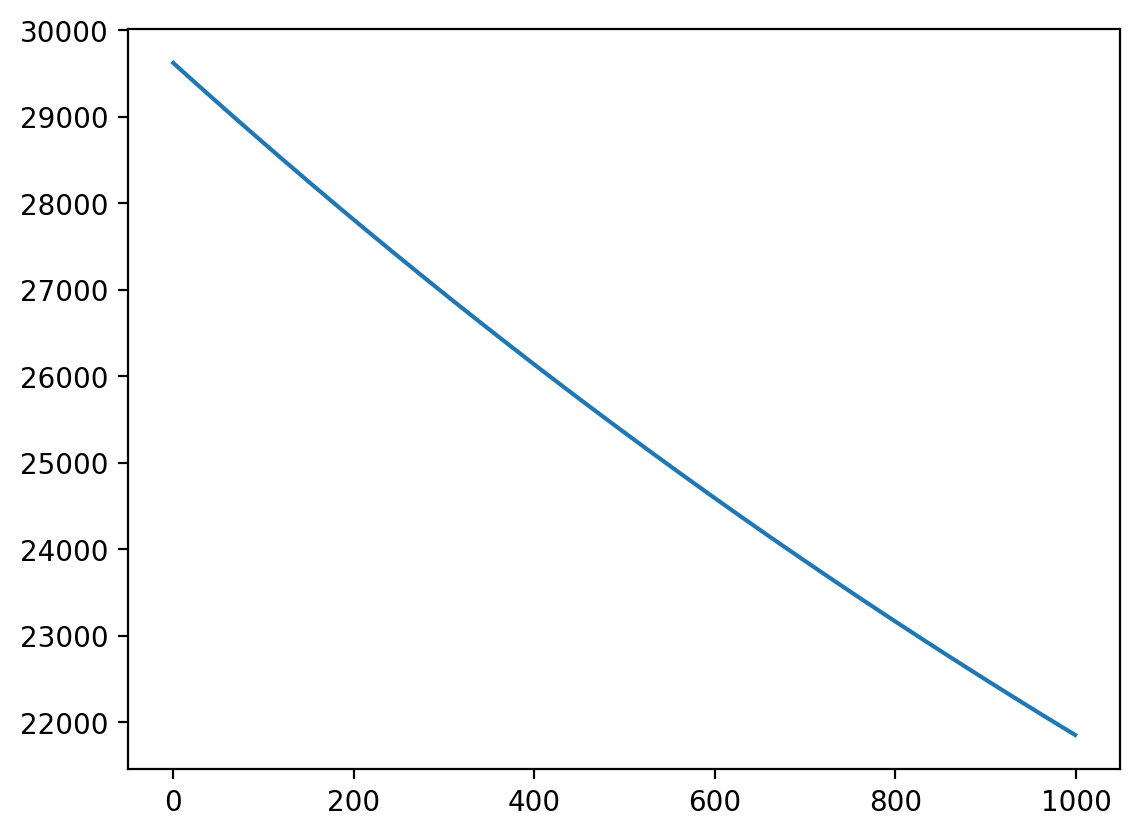

In [111]:
LEARNING_RATE = 0.0001
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

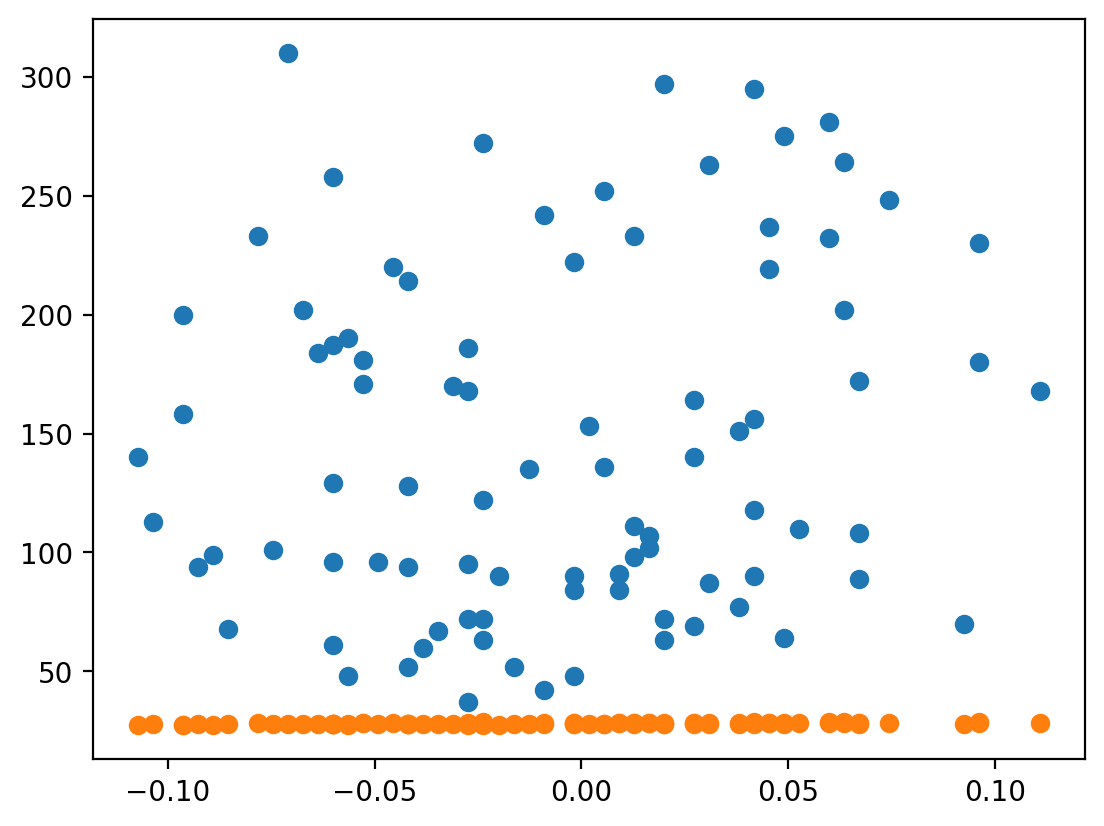

In [119]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
plt.scatter(X_test[:, 0], y_test,label="true")
plt.scatter(X_test[:, 0], prediction,label="pred")
plt.show()

In [116]:
prediction = model(X_test, W, b)
mse = mean_squared_error(y_test, prediction)
mse

19145.77566820135

In [90]:
#Multi_linear_regression
class MultiLinear:
  def __init__(self,learning_rate=0.001):
    self.w=None #모델의 weight 벡터 self.w=(w_1,w_2)
    self.b=None #모델의 bias
    self.lr=learning_rate #모델의 학습률
    self.losses=[] #매 에포크마다 손실을 저장하기 위한 리스트
    self.weight_history=[] #매 에포크마다 계산된 weight를 저장하기 위한 리스트
    self.bias_history=[] #매 에포크마다 계산된 bias를 저장하기 위한 리스트

  def forward(self,x):
    y_pred=np.sum(x*self.w)+self.b #np.sum함수는 인자로 받은 numpy배열의 모든 원소의 합을 return합니다.
    return y_pred

  def loss(self,x,y):
    y_pred=self.forward(x)
    return ((y_pred-y)**2)

  def gradient(self,x,y):
    y_pred=self.forward(x)
    w_grad=2*x*(y_pred-y)
    b_grad=2*(y_pred-y)

    return w_grad,b_grad

  def split(self, df_x,df_y, percent):
    length = int(len(df_x)*(percent/100))
    x_train = df_x[:length]
    x_test = df_x[length:]
    y_train = df_y[:length]
    y_test = df_y[length:]
    return x_train, x_test, y_train, y_test

  def fit(self,x_data,y_data,epochs=20, split = False, test = False , percent = 75):

    if split is True:
        x_train, x_test, y_train, y_test = self.split(x_data,y_data,percent)
        print("x_train_shape:" ,  x_train.shape,"x_test_shape:",x_test.shape, "y_train_shape:", y_train.shape , "y_test_shape:", y_test.shape)
    else:
      x_train, y_train = x_data, y_data

    self.w=np.ones(x_train.shape[1]) #모델의 weight들을 전부 1로 초기화
    print(self.w.shape)
    self.b=0 #모델의 bias를 0으로 초기화

    for epoch in range(epochs):
      l=0 #계산할 손실값
      w_grad=np.zeros(x_train.shape[1]) #weight의 기울기를 누적할 numpy배열
      b_grad=0  #bias의 기울기를 누적할 변수

      for x,y in zip(x_train,y_train):
        l+=self.loss(x,y)
        w_i,b_i=self.gradient(x,y)

        w_grad+=w_i #weight누적
        b_grad+=b_i #bias누적

      self.w-=self.lr*(w_grad/len(y_train)) #weight 업데이트
      self.b-=self.lr*(b_grad/len(y_train)) #bias 업데이트
 
      print(f'epoch ({epoch+1}) ===> loss : {l/len(y_train):.5f}')
      self.losses.append(l/len(y_train)) #손실값 저장
      self.weight_history.append(self.w) #weight 배열 저장
      self.bias_history.append(self.b) #bias값 저장

      if epoch == epochs-1:
        if test is True :
          for x,y in zip(x_test,y_test):
              l+=self.loss(x,y)
          print(f'test_loss : {l/len(y_test):.5f}')

In [91]:
model=MultiLinear(learning_rate=0.1)
model.fit(df_x,df_y,epochs=40, split = True, test = True, percent = 80)

x_train_shape: (353, 10) x_test_shape: (89, 10) y_train_shape: (353,) y_test_shape: (89,)
(10,)
epoch (1) ===> loss : 28730.66636
epoch (2) ===> loss : 20462.89907
epoch (3) ===> loss : 15168.83895
epoch (4) ===> loss : 11777.95820
epoch (5) ===> loss : 9605.11975
epoch (6) ===> loss : 8211.83634
epoch (7) ===> loss : 7317.47642
epoch (8) ===> loss : 6742.43595
epoch (9) ===> loss : 6371.76844
epoch (10) ===> loss : 6131.90820
epoch (11) ===> loss : 5975.77322
epoch (12) ===> loss : 5873.23098
epoch (13) ===> loss : 5804.99669
epoch (14) ===> loss : 5758.72806
epoch (15) ===> loss : 5726.52600
epoch (16) ===> loss : 5703.33506
epoch (17) ===> loss : 5685.91974
epoch (18) ===> loss : 5672.20928
epoch (19) ===> loss : 5660.87837
epoch (20) ===> loss : 5651.07878
epoch (21) ===> loss : 5642.26762
epoch (22) ===> loss : 5634.09740
epoch (23) ===> loss : 5626.34571
epoch (24) ===> loss : 5618.87016
epoch (25) ===> loss : 5611.57961
epoch (26) ===> loss : 5604.41568
epoch (27) ===> loss : 55

In [69]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

ValueError: ignored